In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pathlib
from matplotlib import cm

from queso.utils.io import IO

In [46]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)

                # fix datatype issues
                _df["cfi"] = _df["cfi"].astype('float64')

            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"pure_qfi_batch_sweep")
ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data = load_data(io, ns, ks)

13/02/2023, 16:34:42 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_batch_sweep/n=2_k=2.pkl successfully.
13/02/2023, 16:34:42 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_batch_sweep/n=2_k=3.pkl successfully.
13/02/2023, 16:34:42 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_batch_sweep/n=2_k=4.pkl successfully.
13/02/2023, 16:34:42 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_batch_sweep/n=2_k=5.pkl successfully.
13/02/2023, 16:34:42 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_batch_sw

In [63]:
for n in ns:
    for k in ks:
        df = data[n][k]
        print(f"n={n}, k={k} | {df.cfi.max() if df is not None else 'NA'}")

n=2, k=1 | NA
n=2, k=2 | 3.9999967432839227
n=2, k=3 | 3.99999999989713
n=2, k=4 | 3.999999581583738
n=2, k=5 | 3.999999806432284
n=2, k=6 | 3.999999993435708
n=2, k=7 | 3.9999999999999947
n=2, k=8 | 3.999999999380807
n=2, k=9 | 3.999999989156125
n=2, k=10 | 3.999999997993098
n=2, k=11 | 3.9999999427059305
n=2, k=12 | 3.99999996396584
n=3, k=1 | NA
n=3, k=2 | 8.999999970551567
n=3, k=3 | 8.999999993849311
n=3, k=4 | 8.999998882476516
n=3, k=5 | 8.999999909061918
n=3, k=6 | 8.999999496167856
n=3, k=7 | 8.99999999954017
n=3, k=8 | 8.999999999999261
n=3, k=9 | 8.999999953979058
n=3, k=10 | 8.999999986313899
n=3, k=11 | 8.999999996743323
n=3, k=12 | 8.999999992861914
n=4, k=1 | NA
n=4, k=2 | 9.999940687493515
n=4, k=3 | 15.99999262502416
n=4, k=4 | 15.999995986946917
n=4, k=5 | 15.999982178001034
n=4, k=6 | 15.999700478085073
n=4, k=7 | 15.999996544815806
n=4, k=8 | 15.99999999816122
n=4, k=9 | 15.999999929759355
n=4, k=10 | 15.999999972127071
n=4, k=11 | 15.99999992769839
n=4, k=12 | 15.9

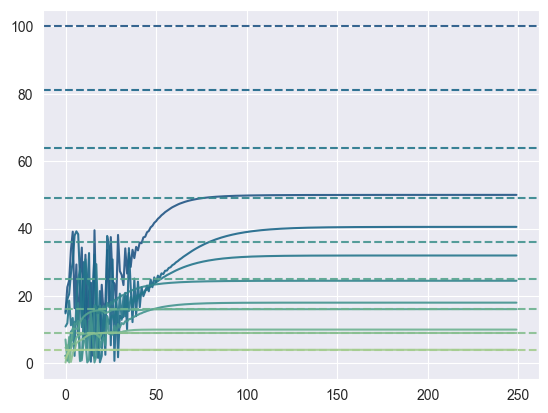

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = sns.color_palette("crest", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))
k = 2
for n in reversed(ns[:-2]):
    ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.9)

    df = data[n][k]
    if df is None:
        continue

    row = df.loc[df["cfi"].idxmax()]
    # for i, row in df.iterrows():
    ax.plot(row.loss, color=colors(norm(n)), alpha=0.9)
plt.show()

### How does the maximal FI change with circuit depth?


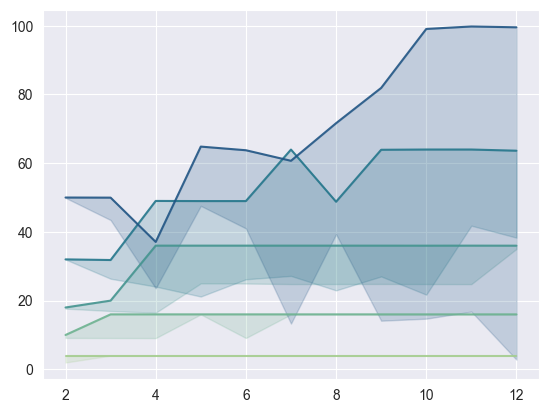

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = sns.color_palette("crest", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

for n in ns[0:-1:2]:
    x, qfi, qfi_min = [], [], []
    for k in ks:
        df = data[n][k]
        if df is None:
            continue
        x.append(k)
        qfi.append(df["cfi"].max())
        qfi_min.append(df["cfi"].min())

    ax.plot(x, qfi, color=colors(norm(n)), alpha=0.9)
    ax.fill_between(x, qfi, qfi_min, color=colors(norm(n)), alpha=0.2)
plt.show()

### Is there a critical depth where the FI can reach the known optimal values?

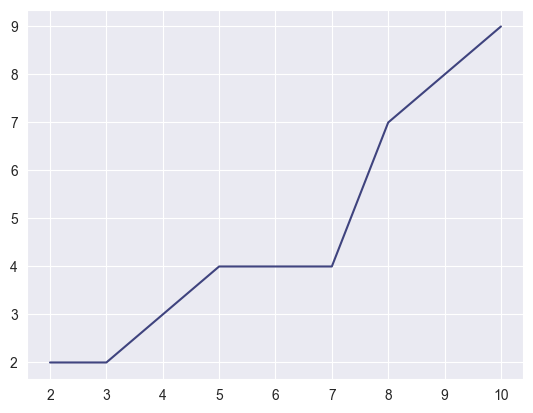

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = sns.color_palette("crest", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

x, min_k = [], []
for n in ns[:]:
    _t = 0
    for k in ks:
        df = data[n][k]
        if df is None:
            continue
        if np.abs(df["cfi"].max() - n**2)/n**2 < 0.2:
            min_k.append(k)
            x.append(n)
            break

ax.plot(x, min_k, color=colors(norm(n)), alpha=0.9)
plt.show()